# $k$-Nearest Neighbors
When linear models prove insufficient for classification, we may move towards non-linear models.  One such mode is _$k$-nearest neighbors_ (also kNN).

The intuition for kNN is that for an _unlabelled_ sample, $s$, we can look to the closest nearby _labelled_ samples to determine what the class of $s$ should be.

# $kNN$ algorithm

The algorithm for kNN is very straighforward:

* Find the $k$ nearest known points
* Average the values for those points
* Assign the class indicated

# What are the "neighborhoods"?

The space that's closer to each point than any other point is considered that point's _neighborhood_.  If $k$=1, then these would be the regions we consider in each class.

![kNN-neighborhoods.png](kNN-neighborhoods.png)

[source](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)

## Regularization in kNN classification
The site below gives a _great_ set of visuals defining $k-NN$ classification and how the $k$ parameter acts as a way to tune between bias and variance (Fig 5).

http://scott.fortmann-roe.com/docs/BiasVariance.html

Increasing $k$ acts as a regularizer and tends towards a more biased, smoother model.

Reducing $k$ allows more variance to be captured in the model.

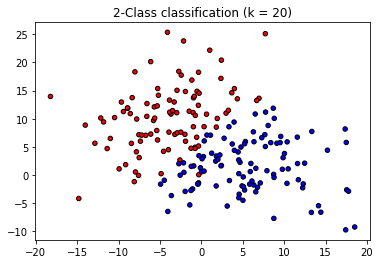

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import (accuracy_score, f1_score, 
                             precision_score, recall_score,
                             classification_report, confusion_matrix)
n_neighbors = 1
n_neighbors = 20
n_classes = 2

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=n_classes, cluster_std=6.0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)

y_pred = clf.predict(X)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cmap_bold,
            edgecolor='k', s=20)

plt.title("%d-Class classification (k = %i)"
          % (n_classes, n_neighbors))
plt.show()

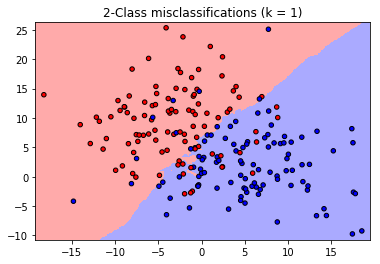

             precision    recall  f1-score   support

          0       0.94      0.85      0.89        39
          1       0.81      0.93      0.86        27

avg / total       0.89      0.88      0.88        66

[[33  6]
 [ 2 25]]


In [5]:
n_neighbors = 1
# n_neighbors = 15
n_classes = 2
h = .1  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#  Now let's plot misclassified samples.  
#
#  Note that we set the color parameter, c, to be the difference between y_pred and y.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%d-Class misclassifications (k = %i)"
          % (n_classes, n_neighbors))

plt.show()

#  And let's add a classification matrix...
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

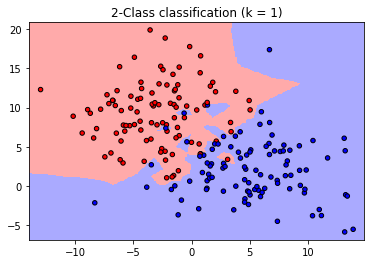

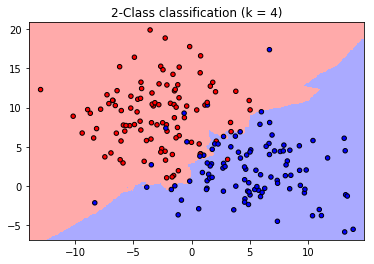

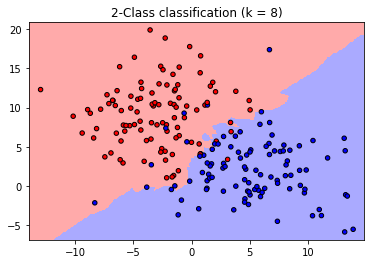

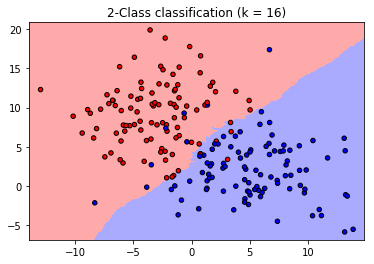

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 1
# n_neighbors = 15
n_classes = 2
h = .1  # step size in the mesh

X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=n_classes, cluster_std=4.0, random_state=42)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for n_neighbors in (1,4,8,16):
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("%d-Class classification (k = %i)"
              % (n_classes, n_neighbors))

plt.show()